In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df=pd.read_csv(r"C:\Users\bhuva\Downloads\AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [181]:
df.shape

(2930, 82)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [183]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [184]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [185]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")   #this is for if we simply give df.isnull().sum() means some of the columns will not be visible so to see all the columns we are using this

Order: 0
PID: 0
MS SubClass: 0
MS Zoning: 0
Lot Frontage: 490
Lot Area: 0
Street: 0
Alley: 2732
Lot Shape: 0
Land Contour: 0
Utilities: 0
Lot Config: 0
Land Slope: 0
Neighborhood: 0
Condition 1: 0
Condition 2: 0
Bldg Type: 0
House Style: 0
Overall Qual: 0
Overall Cond: 0
Year Built: 0
Year Remod/Add: 0
Roof Style: 0
Roof Matl: 0
Exterior 1st: 0
Exterior 2nd: 0
Mas Vnr Type: 1775
Mas Vnr Area: 23
Exter Qual: 0
Exter Cond: 0
Foundation: 0
Bsmt Qual: 80
Bsmt Cond: 80
Bsmt Exposure: 83
BsmtFin Type 1: 80
BsmtFin SF 1: 1
BsmtFin Type 2: 81
BsmtFin SF 2: 1
Bsmt Unf SF: 1
Total Bsmt SF: 1
Heating: 0
Heating QC: 0
Central Air: 0
Electrical: 1
1st Flr SF: 0
2nd Flr SF: 0
Low Qual Fin SF: 0
Gr Liv Area: 0
Bsmt Full Bath: 2
Bsmt Half Bath: 2
Full Bath: 0
Half Bath: 0
Bedroom AbvGr: 0
Kitchen AbvGr: 0
Kitchen Qual: 0
TotRms AbvGrd: 0
Functional: 0
Fireplaces: 0
Fireplace Qu: 1422
Garage Type: 157
Garage Yr Blt: 159
Garage Finish: 159
Garage Cars: 1
Garage Area: 1
Garage Qual: 159
Garage Cond: 159


In [186]:
for col in df.columns:
    if df[col].isnull().sum()>0.6*len(df):
        print(f"{col}: {df[col].isnull().sum()}")

Alley: 2732
Mas Vnr Type: 1775
Pool QC: 2917
Fence: 2358
Misc Feature: 2824


In [187]:
for col in df.columns:
    if df[col].isnull().sum()>0.6*len(df):
        df.drop(col,axis=1,inplace=True)

df.shape

(2930, 77)

In [188]:
for col in df.columns:
    print(f"{col}:{df[col].nunique()}")

Order:2930
PID:2930
MS SubClass:16
MS Zoning:7
Lot Frontage:128
Lot Area:1960
Street:2
Lot Shape:4
Land Contour:4
Utilities:3
Lot Config:5
Land Slope:3
Neighborhood:28
Condition 1:9
Condition 2:8
Bldg Type:5
House Style:8
Overall Qual:10
Overall Cond:9
Year Built:118
Year Remod/Add:61
Roof Style:6
Roof Matl:8
Exterior 1st:16
Exterior 2nd:17
Mas Vnr Area:445
Exter Qual:4
Exter Cond:5
Foundation:6
Bsmt Qual:5
Bsmt Cond:5
Bsmt Exposure:4
BsmtFin Type 1:6
BsmtFin SF 1:995
BsmtFin Type 2:6
BsmtFin SF 2:274
Bsmt Unf SF:1137
Total Bsmt SF:1058
Heating:6
Heating QC:5
Central Air:2
Electrical:5
1st Flr SF:1083
2nd Flr SF:635
Low Qual Fin SF:36
Gr Liv Area:1292
Bsmt Full Bath:4
Bsmt Half Bath:3
Full Bath:5
Half Bath:3
Bedroom AbvGr:8
Kitchen AbvGr:4
Kitchen Qual:5
TotRms AbvGrd:14
Functional:8
Fireplaces:5
Fireplace Qu:5
Garage Type:6
Garage Yr Blt:103
Garage Finish:3
Garage Cars:6
Garage Area:603
Garage Qual:5
Garage Cond:5
Paved Drive:3
Wood Deck SF:380
Open Porch SF:252
Enclosed Porch:183
3Ss

In [189]:
df.drop(columns=["Order","PID"],axis=1,inplace=True)
df.shape

(2930, 75)

In [190]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)

C:\Users\bhuva\AppData\Local\Temp\ipykernel_6980\2388392878.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
C:\Users\bhuva\AppData\Local\Temp\ipykernel_6980\2388392878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [191]:
df.isnull().sum().sum()

0

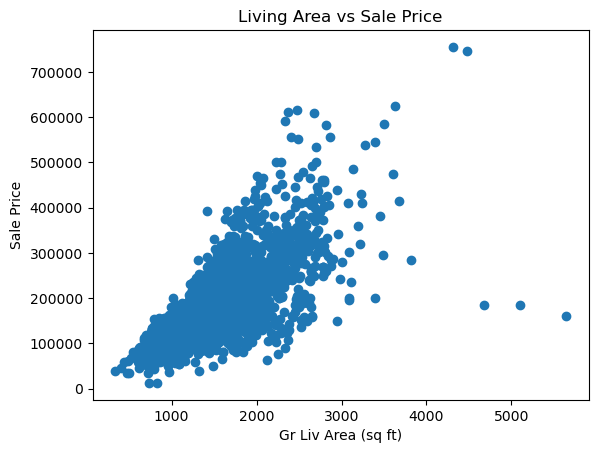

In [192]:
plt.scatter(df['Gr Liv Area'], df['SalePrice'])
plt.title("Living Area vs Sale Price")
plt.xlabel("Gr Liv Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()


In [193]:
!pip install category_encoders

In [194]:
categorical_cols=[]
for col in df.columns:
    if df[col].dtype=="object":
        categorical_cols.append(col)

categorical_cols

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [195]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)

In [196]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,1,141.0,31770,1,1,1,1,1,1,...,0,0,0,0,0,5,2010,1,1,215000
1,20,2,80.0,11622,1,2,1,1,2,1,...,0,0,120,0,0,6,2010,1,1,105000
2,20,1,81.0,14267,1,1,1,1,1,1,...,0,0,0,0,12500,6,2010,1,1,172000
3,20,1,93.0,11160,1,2,1,1,1,1,...,0,0,0,0,0,4,2010,1,1,244000
4,60,1,74.0,13830,1,1,1,1,2,1,...,0,0,0,0,0,3,2010,1,1,189900


In [197]:
x=df.drop('SalePrice', axis=1)
y=df['SalePrice']
x.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,1,141.0,31770,1,1,1,1,1,1,...,62,0,0,0,0,0,5,2010,1,1
1,20,2,80.0,11622,1,2,1,1,2,1,...,0,0,0,120,0,0,6,2010,1,1
2,20,1,81.0,14267,1,1,1,1,1,1,...,36,0,0,0,0,12500,6,2010,1,1
3,20,1,93.0,11160,1,2,1,1,1,1,...,0,0,0,0,0,0,4,2010,1,1
4,60,1,74.0,13830,1,1,1,1,2,1,...,34,0,0,0,0,0,3,2010,1,1


In [198]:
y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [199]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [200]:
x_scaled[:2]

array([[-0.87700484, -0.52047826,  3.36691056,  2.74438073, -0.06412804,
        -1.29704062, -0.30728837, -0.03018202, -1.52992217, -0.21583514,
        -1.36785539, -0.32175812, -0.08420444, -0.39233435, -0.71260189,
        -0.06725371, -0.50671843, -0.37553701, -1.16348813, -1.50783028,
        -0.10692066, -1.35702154, -1.13304067,  0.05663941, -0.71315916,
        -0.34116078, -0.83789299, -0.89920465, -2.35166526, -1.54430662,
        -2.06031292,  0.43117085, -0.32497702, -0.29402292, -0.26917976,
         0.06444434, -0.1057416 , -2.43695618, -0.26774957, -0.27770373,
         1.26700334, -0.78318531, -0.10100494,  0.30926506,  1.0840644 ,
        -0.24939577, -1.02479289, -0.75520269,  0.17609421, -0.20729145,
        -0.83991089,  0.35416673, -0.24646134,  2.16218005, -0.46993158,
        -0.68931403, -0.7305105 , -1.42000185,  0.30669909,  0.25668447,
        -0.2098184 , -0.16117262, -3.46796295,  0.92012131,  0.21440861,
        -0.358838  , -0.10313432, -0.28535442, -0.0

In [201]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [202]:
x_scaled.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,-0.877005,-0.520478,3.366911,2.744381,-0.064128,-1.297041,-0.307288,-0.030182,-1.529922,-0.215835,...,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,-0.283182,-0.397778
1,-0.877005,0.320670,0.505463,0.187097,-0.064128,0.548675,-0.307288,-0.030182,0.064767,-0.215835,...,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,-0.283182,-0.397778


In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [204]:
x_train.shape,y_train.shape

((2344, 74), (2344,))

In [205]:
x_test.shape,y_test.shape

((586, 74), (586,))

In [206]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [207]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [208]:
#Model Prediction
y_pred=model.predict(x_test)
y_pred[:5]

array([171539.67719029, 114278.19836964, 232731.09952305, 109820.03533644,
       122164.48227341])

In [209]:
y_test[:5]

1357    161000
2367    116000
2822    196500
2126    123600
1544    126000
Name: SalePrice, dtype: int64

In [210]:
#Model Evaluatioin
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

85.42584540141513

In [211]:
print("R2Score of the model is ",r2_score(y_test,y_pred)*100,"%")

R2Score of the model is  85.42584540141513 %


In [212]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1168489830.4661396

In [213]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,y_pred)

34183.18052004727

In [214]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

20378.83261632159

In [ ]:
Summary:
-->Imported Libraries like pandas, numpy,matplotlib and seaborn
-->loaded the dataset
-->Handled the Missing Values,Data Cleaning and preparation and done basic visualization
-->Categorical Encoding installed and imported categorical_encoding found all the categorical columns and applied Ordinal Encoding and converted
 all text columns into numeric values
-->Done Scaling by importing StandardScaler from sklearn.preprocessing
--> Splitting the dataset as train and test
-->build the model using linear regression
-->done various model evaluation like r2_score,MSE,RMSE,MAE